# import some  library  and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('bank-additional-full.csv')

# view rows and column using tail function

In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### visuliaze all the columns and perform statical method for filling all null value in the dataset and convt into dummy variable

In [4]:
pd.isnull(df).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [6]:
df['job']=df.job.str.replace('unknown','admin.')

In [7]:
dummy_var=pd.get_dummies(df['job'])

In [8]:
df=pd.concat([df,dummy_var],axis=1)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0


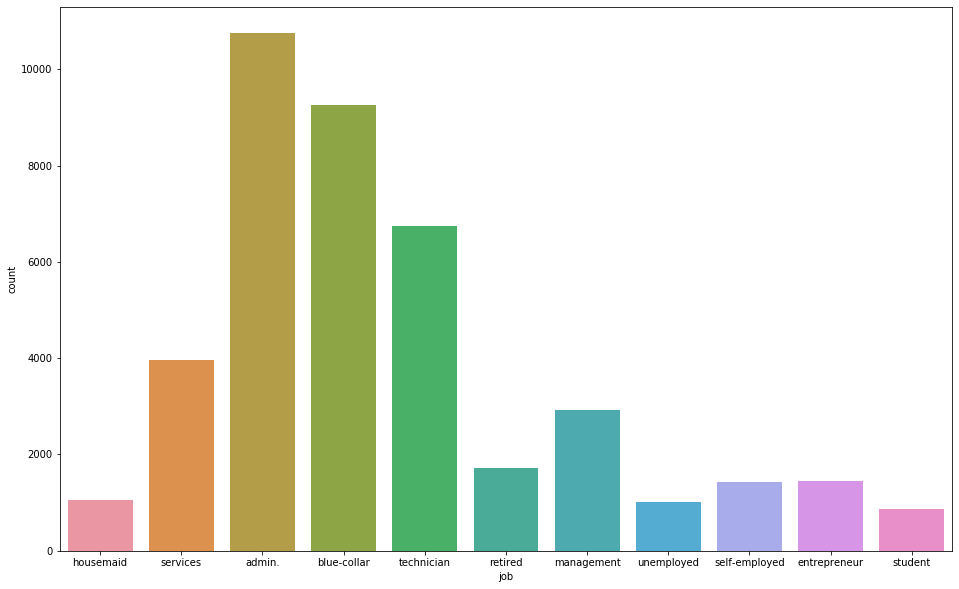

In [10]:
plt.figure(figsize=(16,10))
sns.countplot(df['job'])

In [11]:
df.pop('job')

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

In [12]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [13]:
df.marital=df.marital.replace('unknown','married')

In [14]:
dummy_marital=pd.get_dummies(df['marital'])

In [15]:
df=pd.concat([df,dummy_marital],axis=1)

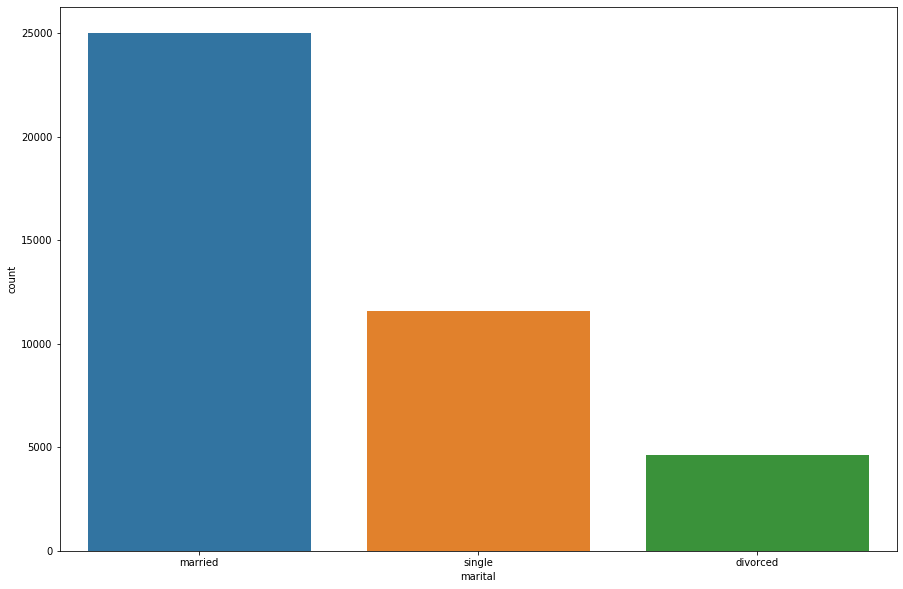

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df['marital'])

In [17]:
df.pop('marital')

0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41188, dtype: object

In [18]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
df.education=df.education.replace('unknown','university.degree')

In [20]:
dummy_edu=pd.get_dummies(df['education'])

In [21]:
df=pd.concat([df,dummy_edu],axis=1)

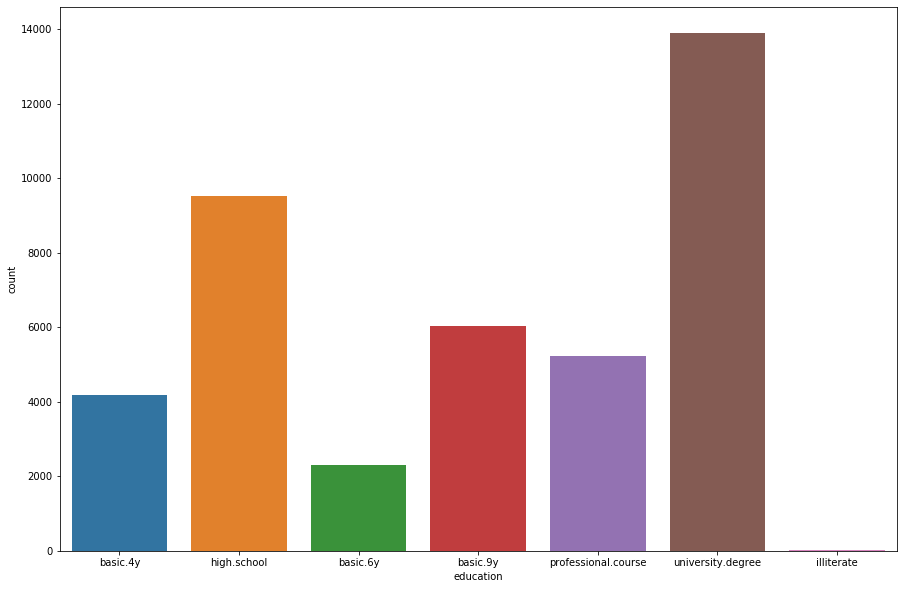

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(df['education'])

In [23]:
df.pop('education')


0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41188, dtype: object

In [24]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [25]:
df.default=df.default.replace('unknown','no')

In [26]:
df.default=df['default'].map({'yes': 1,'no':0})

In [27]:
df.tail()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
41183,73,0,yes,no,cellular,nov,fri,334,1,999,...,0,1,0,0,0,0,0,0,1,0
41184,46,0,no,no,cellular,nov,fri,383,1,999,...,0,1,0,0,0,0,0,0,1,0
41185,56,0,yes,no,cellular,nov,fri,189,2,999,...,0,1,0,0,0,0,0,0,0,1
41186,44,0,no,no,cellular,nov,fri,442,1,999,...,0,1,0,0,0,0,0,0,1,0
41187,74,0,yes,no,cellular,nov,fri,239,3,999,...,0,1,0,0,0,0,0,0,1,0


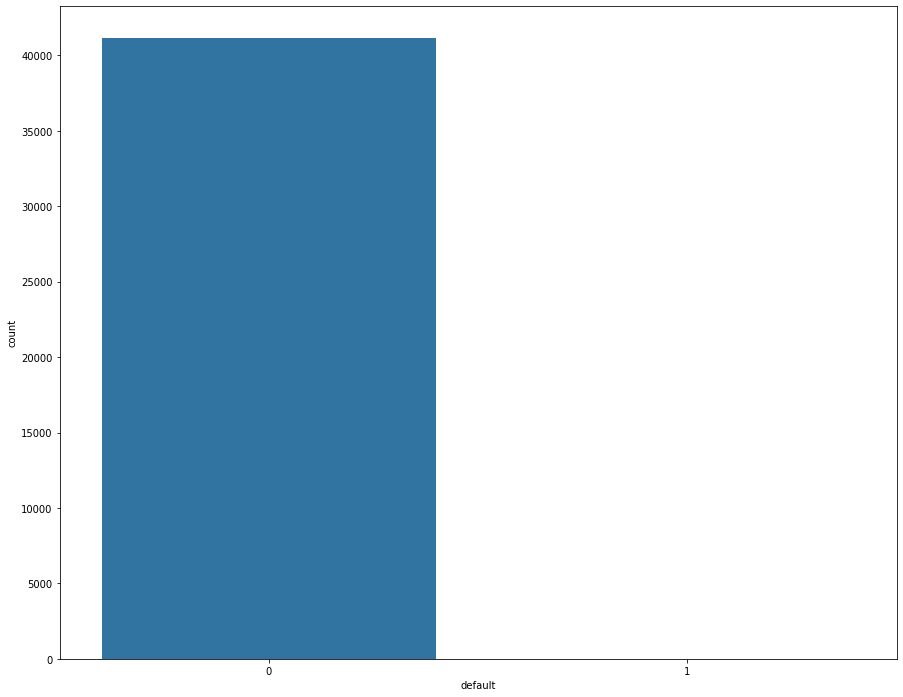

In [28]:
plt.figure(figsize=(15,12))
sns.countplot(df['default'])


In [29]:
df.pop('default')

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: default, Length: 41188, dtype: int64

In [30]:
#sum(df['housing']=='unknown')/len(df)*100

In [31]:
#range(len(df.columns))

In [32]:
#for i in range(len(df.columns)):
   # print(str(round(sum(df[df.columns[i]]=='unknown')/len(df)*100,2))+ ' %')

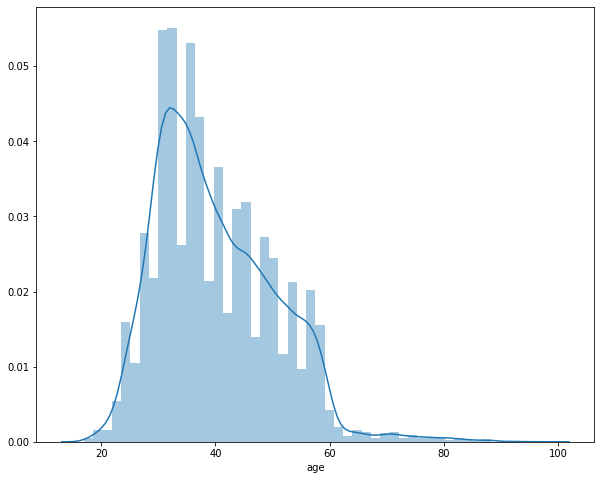

In [33]:
plt.figure(figsize=(10,8))
sns.distplot(df.age)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


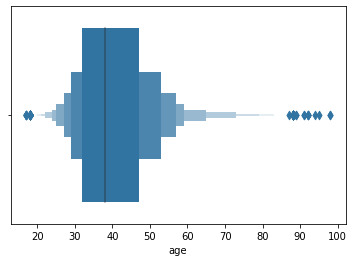

In [34]:
sns.boxenplot(df.age)

In [35]:
#target=df.pop('y')

In [36]:
df.housing.value_counts().head()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [37]:
df.shape

(41188, 38)

In [38]:
df.housing=df['housing'].replace('unknown','yes')

In [39]:
df.housing=df['housing'].map({'yes': 1,'no': 0})

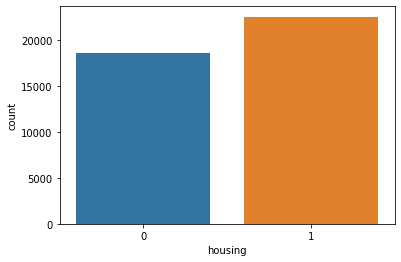

In [40]:
sns.countplot(df['housing'])


In [41]:
df.pop('housing')

0        0
1        0
2        1
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: housing, Length: 41188, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
age                    41188 non-null int64
loan                   41188 non-null object
contact                41188 non-null object
month                  41188 non-null object
day_of_week            41188 non-null object
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
poutcome               41188 non-null object
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
admin.                 41188 non-null uint8
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null u

In [43]:
df.pop('day_of_week')

0        mon
1        mon
2        mon
3        mon
4        mon
        ... 
41183    fri
41184    fri
41185    fri
41186    fri
41187    fri
Name: day_of_week, Length: 41188, dtype: object

In [44]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [45]:
df.loan=df.loan.replace('unknown','no')

In [46]:
loan_dummy=pd.get_dummies(df['loan'])

In [47]:
df=pd.concat([df,loan_dummy],axis=1)

In [48]:
df.pop('loan')

0         no
1         no
2         no
3         no
4        yes
        ... 
41183     no
41184     no
41185     no
41186     no
41187     no
Name: loan, Length: 41188, dtype: object

In [49]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()

In [50]:
#df['contact_Encoded'] = labelencoder.fit_transform(contact.values.reshape(-1, 1))

In [51]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [52]:
df.contact=df['contact'].map({'cellular': 0,'telephone': 1})

In [53]:
pd.isnull(df['contact']).sum()

0

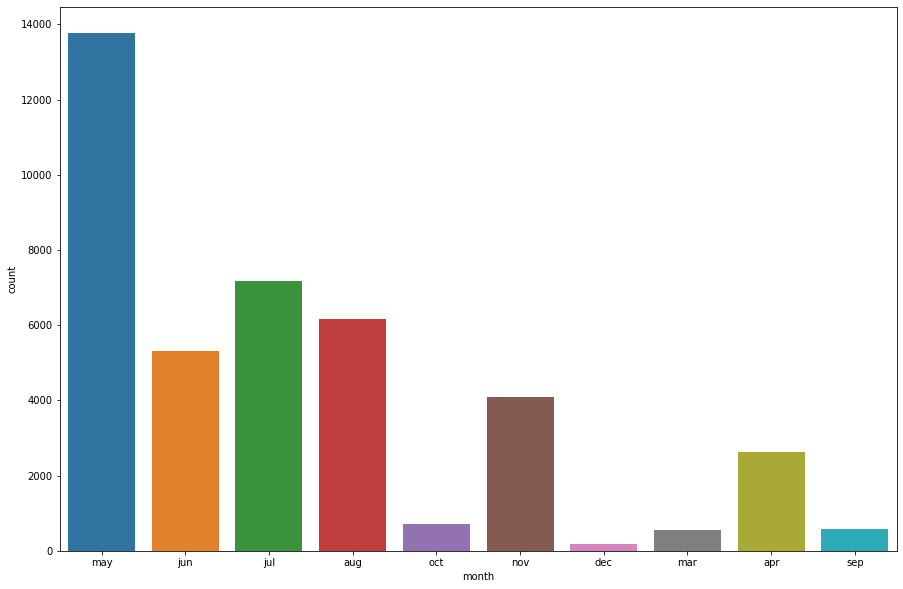

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(df.month)

In [55]:
dummy_month=pd.get_dummies(df['month'])

In [56]:
df=pd.concat([df,dummy_month],axis=1)

In [57]:
df.pop('month')

0        may
1        may
2        may
3        may
4        may
        ... 
41183    nov
41184    nov
41185    nov
41186    nov
41187    nov
Name: month, Length: 41188, dtype: object

In [58]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [59]:
dummy_outcome=pd.get_dummies(df['poutcome'])

In [60]:
df=pd.concat([df,dummy_outcome],axis=1)

In [61]:
df.pop('poutcome')

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, Length: 41188, dtype: object

In [62]:
#target.value_counts()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
age                    41188 non-null int64
contact                41188 non-null int64
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
admin.                 41188 non-null uint8
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
services               41188 non-null uint8


In [64]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [65]:
df.y=df['y'].map({'yes': 1,'no': 0})

In [66]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

### check the columns and rearrangee all the columns then targate variable store in y variable and rest of the column is store in X variable 

In [67]:
df.columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'divorced', 'married', 'single',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'no', 'yes', 'apr', 'aug',
       'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'nonexistent', 'success'],
      dtype='object')

In [68]:
df.columns=['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed',  'admin.', 'blue-collar', 'entrepreneur','housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'divorced', 'married', 'single',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'no', 'yes', 'apr', 'aug',
       'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'nonexistent', 'success','y']

In [69]:
df.columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'divorced', 'married', 'single', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'no', 'yes', 'apr', 'aug',
       'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'nonexistent', 'success', 'y'],
      dtype='object')

In [70]:
X = df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [71]:
#df.pop('day_of_week')
#df.contact.value_counts()

In [72]:
df.contact.value_counts()

0    26144
1    15044
Name: contact, dtype: int64

In [73]:
#y
np.dtype(df.contact)

dtype('int64')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
age                    41188 non-null int64
contact                41188 non-null int64
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
admin.                 41188 non-null int64
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
services               41188 non-null uint8
student                41188 non-null uint8
t

In [75]:
df.iloc[:,:20].head(10)

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1
5,45,1,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1
6,59,1,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0
7,41,1,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0
8,24,1,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0
9,25,1,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1


In [76]:
df.iloc[:,20:32].head(10)

,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,1,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,1,0,0


In [77]:
df.iloc[:,33:48].head(10)

,yes,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,failure,nonexistent,success,y
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## using SMOTE class for balance the imbalance dataset

In [78]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [79]:
X_train,y_train=sm.fit_sample(X,y)

In [80]:
pd.isnull(df['contact']).sum()


0

In [81]:
df.tail(20)

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,jun,mar,may,nov,oct,sep,failure,nonexistent,success,y
41168,38,0,144,2,999,0,-1.1,94.767,-50.8,1.030,...,0,0,0,0,1,0,0,0,1,0
41169,62,0,154,5,999,0,-1.1,94.767,-50.8,1.030,...,0,0,0,0,1,0,0,0,1,0
41170,40,0,293,2,999,4,-1.1,94.767,-50.8,1.030,...,0,0,0,0,1,0,0,1,0,0
41171,33,1,112,1,999,0,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,0,1,0
41172,31,0,353,1,999,0,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,0,1,0
41173,62,0,329,1,999,2,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,1,0,0
41174,62,0,208,1,1,6,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,0,0,1
41175,34,0,180,1,999,2,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,1,0,0
41176,38,0,360,1,999,0,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,0,1,0
41177,57,0,124,6,999,0,-1.1,94.767,-50.8,1.031,...,0,0,0,0,1,0,0,0,1,0


In [82]:
X.shape

(41188, 47)

In [83]:
df.columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'divorced', 'married', 'single', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'no', 'yes', 'apr', 'aug',
       'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'nonexistent', 'success', 'y'],
      dtype='object')

In [84]:
new_X= pd.concat([pd.DataFrame(X),pd.Series(y)], axis=1)

In [85]:
new_X.columns = df.columns

In [86]:
new_X.columns=new_X.columns.str.title()

In [87]:
new_X

,Age,Contact,Duration,Campaign,Pdays,Previous,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,...,Jun,Mar,May,Nov,Oct,Sep,Failure,Nonexistent,Success,Y
0,56.0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,57.0,1.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,37.0,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,40.0,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,56.0,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
41184,46.0,0.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
41185,56.0,0.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
41186,44.0,0.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [88]:
target_variable = new_X.pop('Y')

In [89]:
target_variable

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: Y, Length: 41188, dtype: uint8

### use sklearn library ans splite the data into train and test

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_X,target_variable, test_size=0.3,random_state=5)

In [91]:
X_train.shape,y_train.shape

((28831, 47), (28831,))

### import KNN classifier class from  sklearn library 

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [93]:
y_pred=classifier.predict(X_test)

In [94]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [95]:
pd.Series(y_pred).value_counts()

0    11896
1      461
dtype: int64

In [96]:
y_test.value_counts()

0    11937
1      420
Name: Y, dtype: int64

### create confusion matrix for check accuracy

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [98]:
cm

array([[11896,    41],
       [    0,   420]], dtype=int64)

In [99]:
420/(420+41)

0.911062906724512

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [101]:
precision_score(y_test,y_pred)

0.911062906724512

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11937
           1       0.91      1.00      0.95       420

    accuracy                           1.00     12357
   macro avg       0.96      1.00      0.98     12357
weighted avg       1.00      1.00      1.00     12357



In [103]:
11937/(11937+420)

0.9660111677591648

In [104]:
#precision = TP/TP+FP
print('Precision: ' + str(420/(420+41)*100))

Precision: 91.1062906724512


In [105]:
#Recall = TP/TP+FN
print('Recall: ' + str(420/(420+0)*100))

Recall: 100.0


In [106]:
print("Accuracy = {}%".format((cm.diagonal().sum()/cm.sum()) * 100))

Accuracy = 99.66820425669661%


In [107]:
11896/(11896)*100

100.0

In [108]:
#F1-Score = 2*Precision*recall/(precision+recall)
print('F1-Score: ' + str(2*(91.106*100)/(91.106+100)))

F1-Score: 95.34603832428076


In [109]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.911062906724512
1.0
0.9534619750283768


In [110]:
param_grid={'n_neighbors':range(1,25)}

In [111]:
knn=KNeighborsClassifier(n_neighbors=param_grid,metric='minkowski',p=2)

In [112]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,scoring='f1',n_jobs=-1)

In [113]:
gsc.fit(new_X,target_variable)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors={'n_neighbors': range(1, 25)},
                                            p=2, weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': range(1, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [114]:
gsc.best_score_

0.9628099853859025

In [115]:
gsc.best_params_

{'n_neighbors': 15}

In [116]:
gsc.cv_results_

{'mean_fit_time': array([3.42922359, 2.62248392, 1.84486473, 1.77684579, 1.81454556,
        1.94170516, 2.05380518, 1.91747041, 1.93328314, 1.91967492,
        1.83888037, 2.07813985, 2.28159568, 2.26094937, 2.56733162,
        2.0637779 , 2.11773448, 2.22883816, 2.00453722, 2.41645567,
        2.75433028, 2.05729601, 2.22345181, 1.86281579]),
 'std_fit_time': array([0.49687405, 0.28301387, 0.23420894, 0.06641278, 0.06424333,
        0.15043803, 0.27252249, 0.07788528, 0.08387659, 0.17746982,
        0.0773421 , 0.27890199, 0.1675121 , 0.23920746, 0.42652602,
        0.09035412, 0.2316671 , 0.23685038, 0.14791496, 0.37342262,
        0.66242353, 0.11792832, 0.21777645, 0.19826045]),
 'mean_score_time': array([1.2069706 , 1.34181213, 0.96142724, 1.04121442, 1.06185901,
        1.22681723, 1.28197048, 1.21066127, 1.27175207, 1.21385236,
        1.21913805, 1.46168914, 1.53698761, 1.65686705, 1.63921385,
        1.50636997, 1.47744808, 1.51644275, 1.41651073, 1.96765594,
        1.835489

## import gaussianNB model from sklearn library

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [118]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
G_pred=gnb.predict(X_test)

In [120]:
confusion_matrix(G_pred,y_test)

array([[11937,     1],
       [    0,   419]], dtype=int64)

In [121]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)

In [123]:
kf.get_n_splits(new_X,target_variable)

10

In [124]:
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [126]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=gnb,param_grid=param_grid, cv=10,scoring='accuracy',n_jobs=-1)

### import the classification report to check precision,recall,f1-score

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11937
           1       0.91      1.00      0.95       420

    accuracy                           1.00     12357
   macro avg       0.96      1.00      0.98     12357
weighted avg       1.00      1.00      1.00     12357



## from sklearn library import decision tree classifier model and compare  accuracy to knn and GaussianNB  

In [130]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,max_depth=10)

In [131]:
dsc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
z_pred = dsc.predict(X_train)

In [133]:
train_pred=dsc.predict(X_test)

In [134]:
confusion_matrix(train_pred,y_test)

array([[11937,     2],
       [    0,   418]], dtype=int64)

In [135]:
y_test=np.array(y_test)


In [136]:
cm_dis=confusion_matrix(z_pred,y_train)

In [137]:
cm_dis

array([[27878,     0],
       [    0,   953]], dtype=int64)

In [138]:
np.array(z_pred)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### import accuracy score function to check accurcy

In [139]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,train_pred)

0.9998381484179008

In [141]:
y_test=pd.DataFrame(y_test).iloc[:,0]

In [142]:
y_test=np.array(y_test)

In [143]:
y_test.shape

(12357,)

In [144]:
z_pred.shape

(28831,)

In [145]:
dst=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=3,max_depth=2)

## use gridsearchcv class for best parameter selection 

In [154]:
dst_param_grid=dict({'max_leaf_nodes':range(2,11),'max_depth':range(1,11)})

In [159]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=dst,param_grid=dst_param_grid,cv=10,scoring='accuracy',n_jobs=-1)

In [156]:
gsc.fit(new_X,target_variable)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth={'n_neighbors': range(1, 25)},
                                              max_features=None,
                                              max_leaf_nodes={'n_neighbors': range(1, 25)},
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': 

In [157]:
gsc.best_score_

1.0

In [158]:
gsc.best_params_

{'max_depth': 2, 'max_leaf_nodes': 3}

### import SVM for check the data is linearly seperable or not

In [160]:
param_gird = [{'C': [1, 10, 50, 100], 'kernel': ['linear']},
              {'C': [1, 10, 50, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [161]:
from sklearn.svm import SVC
svc=SVC(kernel=param_grid,random_state=0)

In [162]:
scm_gs = GridSearchCV(estimator=svc, param_grid=param_gird, cv=10, scoring='accuracy', n_jobs=-1)

In [164]:
scm_gs.fit(new_X, target_variable)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated',
                           kernel={'max_depth': range(1, 11),
                                   'max_leaf_nodes': range(2, 11)},
                           max_iter=-1, probability=False, random_state=0,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 50, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [165]:
scm_gs.best_params_

{'C': 50, 'kernel': 'linear'}

In [166]:
scm_gs.best_score_

0.997062251141109

In [167]:
#Random Forest classifier model to find data is 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [168]:
rfc_pred=rfc.predict(X_test)

In [169]:
rfc_pred,y_test

(array([0, 0, 0, ..., 1, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 1, 0, 0], dtype=uint8))

In [170]:
confusion_matrix(y_test,rfc_pred)

array([[11936,     1],
       [    2,   418]], dtype=int64)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc_pred)

0.9997572226268512

In [172]:
#from sklearn.feature_selection import SelectFromModel
#sfm=SelectFromModel()

In [406]:
#new_X.columns
rfc.feature_importances_.shape

(47,)

In [411]:

x=pd.DataFrame({'Feature Names': new_X.columns,'Feature Importance': rfc.feature_importances_*100})

In [414]:
x= x.sort_values('Feature Importance', ascending=False)

In [452]:
plt.figure(figsize=(20,30))
sns.rugplot()

TypeError: rugplot() missing 1 required positional argument: 'a'

<Figure size 1440x2160 with 0 Axes>

In [174]:
np.set_printoptions(suppress=True)

In [175]:
len(new_X.columns)

47

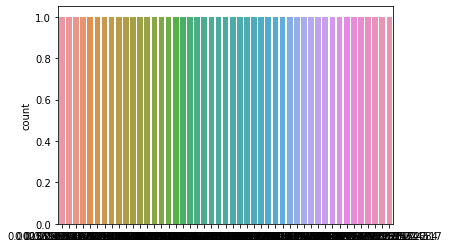

In [176]:
sns.countplot(rfc.feature_importances_*100)

In [185]:
np.shape(rfc.feature_importances_)

(47,)

In [186]:
pd.Series(rfc.feature_importances_).T

0     0.006400
1     0.000709
2     0.012051
3     0.002878
4     0.311174
5     0.094128
6     0.043678
7     0.029088
8     0.000913
9     0.069544
10    0.036745
11    0.020625
12    0.000553
13    0.002199
14    0.000133
15    0.000264
16    0.000997
17    0.000738
18    0.000493
19    0.000508
20    0.000356
21    0.000798
22    0.000589
23    0.000456
24    0.000973
25    0.000787
26    0.000776
27    0.000505
28    0.000753
29    0.000758
30    0.000000
31    0.000972
32    0.000669
33    0.000924
34    0.000851
35    0.000314
36    0.000462
37    0.000235
38    0.000736
39    0.001321
40    0.000026
41    0.000810
42    0.000466
43    0.000580
44    0.000297
45    0.136947
46    0.213823
dtype: float64

In [187]:
pd.Series(new_X.columns).head()

0         Age
1     Contact
2    Duration
3    Campaign
4       Pdays
dtype: object

In [188]:
pd.concat([pd.Series(new_X.columns),pd.Series(rfc.feature_importances_)],axis=1).columns=['feature','feature importance']

In [189]:
feature=pd.concat([pd.Series(new_X.columns),pd.Series(rfc.feature_importances_)],axis=1)

In [190]:
feature.columns=['feature','feature importance']

In [191]:
feature_importance = feature.sort_values('feature importance',ascending=False)

# Visulization of feature importance

In [193]:
feature_importance.index=range(0,47)

In [194]:
feature_importance.head()

,feature,feature importance
0,Pdays,0.311174
1,Success,0.213823
2,Nonexistent,0.136947
3,Previous,0.094128
4,Euribor3M,0.069544


In [209]:
new_X

,Age,Contact,Duration,Campaign,Pdays,Previous,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Euribor3M,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Failure,Nonexistent,Success
0,56.0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,57.0,1.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,37.0,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,40.0,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,56.0,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41184,46.0,0.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41185,56.0,0.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41186,44.0,0.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [250]:
selected_feature=new_X.loc[:, ['Pdays','Success','Nonexistent','Previous','Euribor3M','Emp.Var.Rate','Nr.Employed',
                            'Cons.Price.Idx','Admin.','Duration','Age']]

In [251]:
selected_feature.head()

,Pdays,Success,Nonexistent,Previous,Euribor3M,Emp.Var.Rate,Nr.Employed,Cons.Price.Idx,Admin.,Duration,Age
0,999.0,1.0,0.0,0.0,4.857,1.1,5191.0,93.994,0.0,261.0,56.0
1,999.0,1.0,0.0,0.0,4.857,1.1,5191.0,93.994,0.0,149.0,57.0
2,999.0,1.0,0.0,0.0,4.857,1.1,5191.0,93.994,0.0,226.0,37.0
3,999.0,1.0,0.0,0.0,4.857,1.1,5191.0,93.994,0.0,151.0,40.0
4,999.0,1.0,0.0,0.0,4.857,1.1,5191.0,93.994,0.0,307.0,56.0


In [529]:
selected_feature.to_excel(r'D:\data\PCA.xlsx', index=False)

# After feature selection again using decision tree classifier to compare accuracy.

In [252]:
dsc_new=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,max_depth=10)

In [253]:
X_train,X_test,y_train,y_test=train_test_split(selected_feature, target_variable)

In [254]:
X_train.isnull().sum()

Pdays             0
Success           0
Nonexistent       0
Previous          0
Euribor3M         0
Emp.Var.Rate      0
Nr.Employed       0
Cons.Price.Idx    0
Admin.            0
Duration          0
Age               0
dtype: int64

In [255]:
dsc_new.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Making prediction on unseen data.

In [256]:
pred_dsc_new = dsc_new.predict(X_test)

In [257]:
confusion_matrix(y_test, pred_dsc_new)

array([[9959,    0],
       [   0,  338]], dtype=int64)

### Making prediction on seen data.

In [258]:
pred_on_traindata = dsc_new.predict(X_train)

In [259]:
confusion_matrix(pred_on_traindata, y_train)

array([[29856,     0],
       [    0,  1035]], dtype=int64)

In [260]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [261]:
pca.fit(selected_feature)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [262]:
pca.components_

array([[-0.07379517, -0.00005341, -0.00001371,  0.00010383, -0.00035829,
        -0.00028525, -0.01939796, -0.00000384,  0.00051475,  0.9970845 ,
         0.00004259],
       [-0.98401258, -0.00092536,  0.00002706,  0.00157849, -0.00316668,
        -0.0026426 , -0.16101092, -0.00033666,  0.00049678, -0.07596257,
         0.00192262]])

In [263]:
pca.explained_variance_ratio_

array([0.62711425, 0.33100403])

In [264]:
pca_data=pca.fit_transform(selected_feature)

In [265]:
pca_data=pd.DataFrame(pca_data,columns=['PCA1','PCA2'])

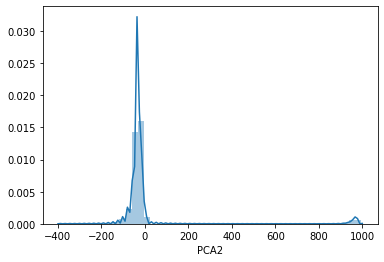

In [266]:
sns.distplot(pca_data.iloc[:,1])

In [267]:
print('PCA 1 data is',pca_data.iloc[:,0])

PCA 1 data is 0         -0.453251
1       -112.126673
2        -35.352018
3       -110.133228
4         45.412636
            ...    
41183     76.748248
41184    125.603723
41185    -67.830244
41186    184.432138
41187    -17.975109
Name: PCA1, Length: 41188, dtype: float64


In [268]:
pca_data.iloc[:,1]

0       -39.981817
1       -31.472087
2       -37.359657
3       -31.656696
4       -43.476095
           ...    
41183    -8.862342
41184   -12.636915
41185     2.119050
41186   -17.122055
41187    -1.641941
Name: PCA2, Length: 41188, dtype: float64

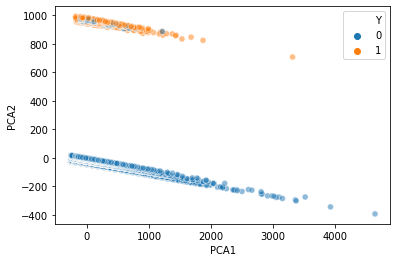

In [271]:
sns.scatterplot(pca_data.iloc[:,0],pca_data.iloc[:,1],hue=target_variable, alpha=.5)

In [275]:
target_variable = pd.Series(target_variable)

# Making a Machine learning model using Extract(PCA) data.

In [276]:
from sklearn.svm import SVC
svm_classifier=SVC(C=10,kernel='linear')

In [278]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data, target_variable, random_state = 0, test_size=.25)

In [279]:
svm_classifier.fit(X_train_pca, y_train_pca)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [280]:
pca_y_pred = svm_classifier.predict(X_test_pca)

In [281]:
accuracy_score(pca_y_pred, y_test_pca)

0.9962124890744877

In [282]:
confusion_matrix(pca_y_pred, y_test_pca)

array([[9917,    0],
       [  39,  341]], dtype=int64)

In [283]:
from sklearn.metrics import classification_report
print(classification_report(pca_y_pred, y_test_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9917
           1       1.00      0.90      0.95       380

    accuracy                           1.00     10297
   macro avg       1.00      0.95      0.97     10297
weighted avg       1.00      1.00      1.00     10297



In [284]:
from sklearn.metrics import precision_score
precision_score(pca_y_pred, y_test_pca)

1.0

In [285]:
from sklearn.metrics import recall_score
recall_score(pca_y_pred, y_test_pca)

0.8973684210526316

In [286]:
from sklearn.metrics import f1_score
f1_score(pca_y_pred, y_test_pca)

0.9459084604715673

In [287]:
param_grid={'C':[.001,.01,.1,1.5,2,2.5,3,3.5,4,4.5,5]}

In [288]:
classifier_svc=SVC({'C':param_grid,'kernel':'linear'})

In [289]:
from sklearn.model_selection import GridSearchCV
gsc_pca=GridSearchCV(estimator=classifier_svc,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=10)

In [291]:
gsc_pca.fit(pca_data,target_variable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C={'C': {'C': [0.001, 0.01, 0.1, 1.5, 2, 2.5, 3, 3.5,
                                          4, 4.5, 5]},
                              'kernel': 'linear'},
                           cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
                               5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [293]:
gsc_pca.best_params_

{'C': 4.5}

In [294]:
gsc_pca.best_score_

0.9772020976983588

In [295]:
gsc_pca.best_estimator_

SVC(C=4.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [296]:
param_grid={'C':[4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,]}

In [297]:
gsc_pca=GridSearchCV(estimator=classifier_svc,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=10)

In [298]:
gsc_pca.fit(pca_data,target_variable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C={'C': {'C': [0.001, 0.01, 0.1, 1.5, 2, 2.5, 3, 3.5,
                                          4, 4.5, 5]},
                              'kernel': 'linear'},
                           cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
                               5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [299]:
gsc_pca.best_estimator_

SVC(C=4.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [300]:
gsc_pca.best_params_

{'C': 4.5}

In [301]:
gsc_pca.best_score_

0.9772020976983588

In [302]:
gsc_pca.classes_

array([0, 1], dtype=uint8)

In [303]:
gsc_pca.error_score

'raise-deprecating'

In [304]:
gsc_pca.decision_function

<function sklearn.model_selection._search.BaseSearchCV.decision_function(self, X)>

In [305]:
gsc_pca.estimator

SVC(C={'C': {'C': [0.001, 0.01, 0.1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]},
       'kernel': 'linear'},
    cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr',
    degree=3, gamma='auto_deprecated', kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [306]:
param_grid = {'C': [0.0001],
 'max_iter': [0.0001]}

In [307]:
from sklearn.linear_model import LogisticRegression
lr_classifier= LogisticRegression(max_iter=param_gird,C=param_gird,penalty='l1',random_state = 0)


In [308]:
lr_classifier= LogisticRegression(random_state = 0)

In [309]:
lr_classifier.fit(X_train_pca,y_train_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [310]:
lr_pred=lr_classifier.predict(X_test_pca)

In [311]:
accuracy_score(y_test_pca,lr_pred)

0.9962124890744877

In [312]:
train_pred = lr_classifier.predict(X_train_pca)

In [313]:
accuracy_score(train_pred, y_train_pca)

0.996665695510019

In [314]:
lr_pca=GridSearchCV(estimator=lr_classifier,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=10)

In [316]:
lr_pca.fit(pca_data, target_variable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001], 'max_iter': [0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [347]:
lr_pca.best_params_

{'C': 0.0001, 'max_iter': 0.0001}

In [348]:
lr_pred=lr_classifier.predict(X_test_pca)

In [349]:
accuracy_score(y_test_pca,lr_pred)

0.9962124890744877

In [350]:
confusion_matrix(y_test_pca,lr_pred)

array([[9917,   39],
       [   0,  341]], dtype=int64)

In [321]:
print(classification_report(y_test_pca,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9956
           1       0.90      1.00      0.95       341

    accuracy                           1.00     10297
   macro avg       0.95      1.00      0.97     10297
weighted avg       1.00      1.00      1.00     10297



In [322]:
from sklearn.ensemble import RandomForestClassifier
rfc_pca = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



In [323]:
rfc_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [342]:
 #from sklearn.exceptions import NotFittedError

In [325]:
y_rfc_pred=rfc_pca.predict(X_test_pca)

### Pca accuracy

In [326]:
accuracy_score(y_test_pca,y_rfc_pred)

0.996115373409731

In [327]:
confusion_matrix(y_test_pca,y_rfc_pred)

array([[9921,   35],
       [   5,  336]], dtype=int64)

In [328]:
print(classification_report(y_test_pca,y_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9956
           1       0.91      0.99      0.94       341

    accuracy                           1.00     10297
   macro avg       0.95      0.99      0.97     10297
weighted avg       1.00      1.00      1.00     10297



In [329]:
pca_data.to_excel(r'D:\data\PCA.xlsx', index=False)

# Xtream Geadient Boosting Algorithm with grid searchCV for hyperparamenter tunning

In [358]:
import xgboost as xgb

In [359]:
xgb_classifier=xgb.XGBClassifier()

In [360]:
xgb_param={
           'learning_rate' : [0.05,0.10,0.15,0.20,0,25,0.30,0.35],
           'max_depth' : range(3,15),
           'min_child_weight':[1,3,5,7],
           'gamma': [0.0,0.1,0.2,0.3,0.4,0.5],
            'colsample_bytree' : [0.3,0.4,0.6,0.7]
          }

In [361]:
xgb_search=GridSearchCV(estimator=xgb_classifier,param_grid=xgb_param,n_jobs=-1,cv=5,verbose=3)

In [362]:
xgb_search.estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [363]:
xgb_classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [364]:
xgb_classifier.fit(X_train_pca,y_train_pca)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [366]:
xgb_pred=xgb_classifier.predict(X_test_pca)

In [368]:
confusion_matrix(y_test_pca,xgb_pred)

array([[9917,   39],
       [   0,  341]], dtype=int64)

In [369]:
accuracy_score(y_test_pca,xgb_pred)

0.9962124890744877

In [370]:
from sklearn.metrics import classification_report

In [371]:
print(classification_report(y_test_pca,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9956
           1       0.90      1.00      0.95       341

    accuracy                           1.00     10297
   macro avg       0.95      1.00      0.97     10297
weighted avg       1.00      1.00      1.00     10297



In [ ]:
accuracu
precision,recall and f1-score
Sensitivity and Specificity
AUC and ROC curve
CAP curve analysis

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.998


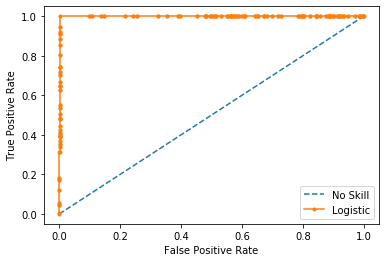

In [398]:
ns_probs = [0 for _ in range(len(y_test_pca))]
ns_auc = roc_auc_score(y_test_pca, ns_probs)
lr_auc = roc_auc_score(y_test_pca, lr_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_pca, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_pca, lr_prob)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [388]:
lr_prob = lr_classifier.predict_proba(X_test_pca)[:,1]

In [385]:
lr_classifier.predict(X_test_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [399]:
ns_fpr

array([0., 1.])

In [393]:
len(target_variable)

41188

In [394]:
len(lr_prob)

10297

In [397]:
len(y_test_pca)

10297

# PIPELINE METHOD

In [550]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [551]:
pipeline_lr=Pipeline([('scalar', StandardScaler()),
                       ('lr_classifier', LogisticRegression())])

In [552]:
pipeline_dt=Pipeline([('scalar', StandardScaler()),
                       ('dsc_classifier', DecisionTreeClassifier())])

In [553]:
pipeline_rf=Pipeline([('scalar', StandardScaler()),
                       ('rfc_classifier', RandomForestClassifier())])

In [554]:
pipeline_knn=Pipeline([('scalar', StandardScaler()),
                       ('knn_classifier', KNeighborsClassifier())])

In [555]:
pipeline_xgb=Pipeline([('scalar', StandardScaler()),
                       ('xgb_classifier', xgb.XGBClassifier())])

In [556]:
pipeline_svc=Pipeline([('scalar', StandardScaler()),
                       ('svc_classifier', SVC())])

In [563]:
pipe_dictonary={0:'logisticregression',1 :'DecisionTree', 2 : 'RandomForestClassifier', 3:'KNeighborsClassifier', 4 : 'XGBClassifie', 5 : 'SVC'}

In [564]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgb,pipeline_svc]

In [565]:
for pipes in pipelines:
    pipes.fit(X_train_pca,y_train_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [566]:
for i,model in enumerate(pipelines):
    print('{} test accuracy : {}'.format(pipe_dictonary[i],model.score(X_test_pca,y_test_pca)))

logisticregression test accuracy : 0.9962124890744877
DecisionTree test accuracy : 0.9946586384383801
RandomForestClassifier test accuracy : 0.9958240264154609
KNeighborsClassifier test accuracy : 0.9964067204040011
XGBClassifie test accuracy : 0.9962124890744877
SVC test accuracy : 0.9962124890744877
